In [319]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st 
import numpy as np
from scipy.stats import linregress


In [219]:
# Csv files
study_csv = "Resources/Study_results.csv"
mouse_csv = "Resources/Mouse_metadata.csv"

# Create DataFrame
study_df = pd.read_csv(study_csv)
mouse_df = pd.read_csv(mouse_csv)

# Merge DataFrame
df = pd.merge(study_df, mouse_df, how="left", on="Mouse ID")
df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [220]:
# Display number of unique mice IDs 
len(df["Mouse ID"].unique())


249

In [221]:
# Display data associated w/mouse ID 
duplicate = df.loc[df["Mouse ID"]=="g989",:]
duplicate.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [222]:
# Create new DataFrame w/out duplicates
data = df.loc[df["Mouse ID"] !="g989"]
data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [224]:
# Updated number of unique mice IDs
len(data["Mouse ID"].unique())

248

#### Generate Summary Statistics

In [225]:
# Create summary statistics DataFrame that includes:
    # A row for each drug regimen. 
    # A column for each of the following statistics: mean, median, variance, std, and SEM of the tumor volume.
mean = data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
mode = data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary = data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary.head(5)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

#### Create Bar Charts and Pie Charts 

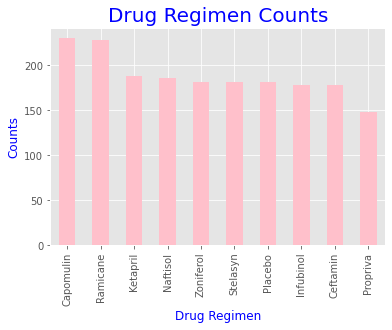

In [227]:
# Create two bar charts showing total # of time points for all mice tested for each drug
# bar_1 w/Pandas "DataFrame.plot()" 
bar = data["Drug Regimen"].value_counts()
bar.plot(kind = "bar", color="pink")
plt.title("Drug Regimen Counts", color="blue", fontsize=20)
plt.xlabel("Drug Regimen", color="blue", fontsize=12)
plt.ylabel("Counts", color="blue", fontsize=12)

plt.xticks(rotation="vertical")
plt.show()


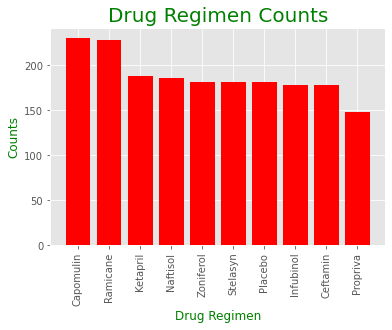

In [228]:
# bar_2 w/Matplotlib's "pyplot" 
plt.bar(bar.index.values, bar.values, color="red")
plt.title("Drug Regimen Counts", color="green", fontsize=20)
plt.xlabel("Drug Regimen", color="green", fontsize=12)
plt.ylabel("Counts", color="green", fontsize=12)

plt.xticks(rotation="vertical")
plt.show()

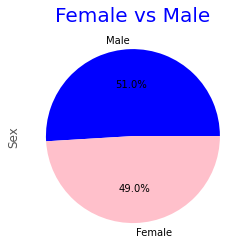

In [230]:
# Create two pie charts showing the distribution of female versus male mice in the study
# pie_1 w/Pandas "DataFrame.plot()" 
pie = data["Sex"].value_counts()
colors = ["blue", "pink"]
pie.plot(kind = "pie", autopct="%1.1f%%", colors=colors)

plt.title("Female vs Male", color="Blue", fontsize=20)
plt.show()   

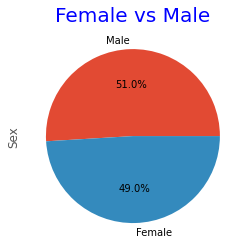

In [237]:
# pie_2 w/ "pyplot" 
label=["Male", "Female"]
plt.pie(pie, labels=label, autopct="%1.1f%%")
plt.ylabel("Sex")

plt.title("Female vs Male", color="Blue", fontsize=20)
plt.show()

#### Calculate Quartiles, Find Outliers, and Create a Box Plot

In [259]:
# Calculate final tumor volume per mouse across four treatment regimens: (Capomulin, Ramicane, Infubinol, and Ceftamin)
# Calulate quartiles & IQR & determine if there are potential outliers for all four treatment regimens

# Create DataFrame showing "greatest" time point per mouse. 
greatest = data.groupby(["Mouse ID"])["Timepoint"].max()
greatest = greatest.reset_index()

# Merge DataFrame w/original cleaned DataFrame
merge = greatest.merge(data, on=["Mouse ID", "Timepoint"], how="left")
merge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [263]:
# Create list holding treatment names & empty list holding tumor volume data
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []

# Loop through drug treatment, locate row in the merged DataFrame corresponding w/treatment
for drug in treatment: 
    final = merge.loc[merge["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # Append final tumor volumes result for each drug to empty list
    tumor_volume.append(final)
    
    # Determine outliers using upper & lower bounds and print results
    quartiles = final.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
    
    print(f"The lower quartile of final tumor volume is: {lowerq}")
    print(f"The upper quartile of final tumor volume is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The median of final tumor volume is: {quartiles[0.5]}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outliers = final.loc[(final < lower_bound)|(final > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    

The lower quartile of final tumor volume is: 32.37735684
The upper quartile of final tumor volume is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of final tumor volume is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of final tumor volume is: 31.56046955
The upper quartile of final tumor volume is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The median of final tumor volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of final tumor volume is: 54.04860769
The upper quartile of final tumor volume is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The median of fin

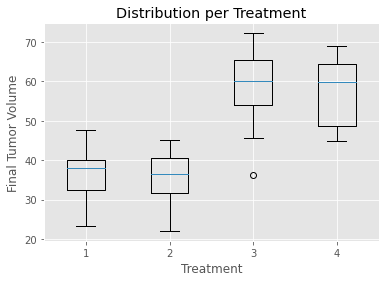

In [264]:
# Using Matplotlib, create box plot showing distribution of final tumor volume for all mice in treatment group. 
# Highlight potential outliers in plot by changing color & style
    # HINT: All four box plots should be w/in the same figure
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume)
ax1.set_title("Distribution per Treatment")
ax1.set_ylabel("Final Tumor Volume")
ax1.set_xlabel("Treatment")
plt.show()


#### Create a Line Plot and a Scatter Plot

In [265]:
data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [303]:
# Capomulin DataFrame
capomulin = data.loc[data["Drug Regimen"]=="Capomulin"]
capomulin.head(5)
#capomulin.shape

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [278]:
# Create line plot "tumor volume" vs "time point" for mouse (Capomulin)
mouse = capomulin.loc[capomulin["Mouse ID"]=="r554"]
mouse.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
227,r554,0,45.000000,0,Capomulin,Female,8,17
433,r554,5,45.781746,1,Capomulin,Female,8,17
498,r554,10,39.005494,2,Capomulin,Female,8,17
808,r554,15,35.463758,2,Capomulin,Female,8,17
940,r554,20,36.015589,2,Capomulin,Female,8,17


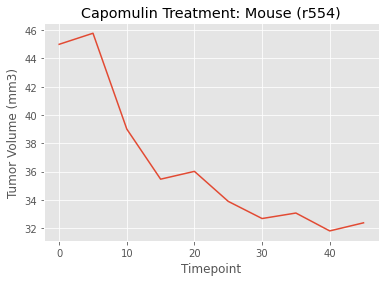

In [304]:
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])

plt.title("Capomulin Treatment: Mouse (r554)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [305]:
capomulin.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


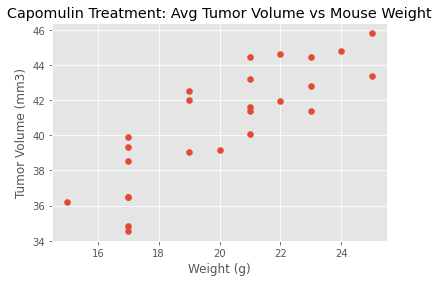

In [309]:
# Create scatter plot "average tumor volume" vs "mouse weight" (Capomulin)
avg = capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(avg["Weight (g)"], avg["Tumor Volume (mm3)"])

plt.title("Capomulin Treatment: Avg Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



#### Calculate Correlation and Regression

In [317]:
# Calculate correlation coefficient & linear regression b/w "mouse weight" & "avg tumor volume" (Capomulin)
x = avg["Weight (g)"]
y = avg["Tumor Volume (mm3)"]
correlation = st.pearsonr(x,y)

print(f"The correlation betwen both factors is {round(correlation[0], 2)}")

The correlation betwen both factors is 0.84


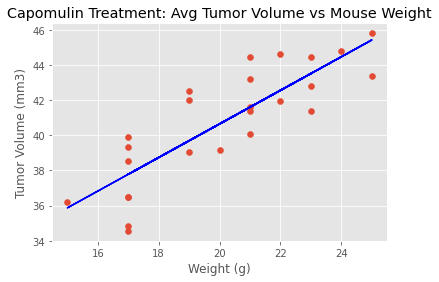

In [327]:
# Linear regression on "Capomulin Treatment: Avg Tumor Volume vs Mouse Weight"
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "b-")

plt.title("Capomulin Treatment: Avg Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()